In [1]:
import numpy as np
import matplotlib.pyplot as plt

x1 = np.linspace(-2, 2, 100)
x2 = np.linspace(-1, 3, 100)
X1, X2 = np.meshgrid(x1, x2)


def f(x1, x2):
    return (1 - x1) ** 2 + 100 * (x2 - x1 ** 2) ** 2


iter = 0
x0 = np.array([-1.5, 1.5])
eps = 0.000001


def descent(x):
    return np.array([-2 * (1 - x[0]) - 400 * x[0] * (x[1] - x[0] ** 2),
                     200 * (x[1] - x[0] ** 2)])


def hessian(x):
    return np.array([[2 - 400 * x[1] + 1200 * x[0] ** 2, -400 * x[0]],
                     [-400 * x[0], 200]])

In [2]:
def lmf(x0, eps):
    x = x0
    mu = 0.001
    v = 2
    path = [x]  # 用于记录路径

    while np.linalg.norm(descent(x)) > eps:
        J = descent(x)
        H = hessian(x)

        # Add damping factor to the diagonal of the Hessian
        H_lm = H + mu * np.eye(2)

        delta_x = np.linalg.solve(H_lm, -J)
        new_x = x + delta_x

        new_f = f(*new_x)
        f_x = f(*x)

        # Update damping factor based on the change in the objective function
        if new_f < f_x:
            mu /= v
            x = new_x
        else:
            mu *= v

        path.append(x)  # 记录路径

    return x, path

In [3]:
optimal_x, path = lmf(x0, eps)
optimal_f = f(*optimal_x)

print("Optimal x:", optimal_x)
print("Optimal f(x):", optimal_f)

Optimal x: [0.99999972 0.99999944]
Optimal f(x): 7.782174592529788e-14


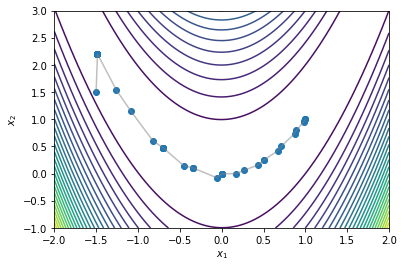

In [4]:
plt.contour(X1, X2, f(X1, X2), levels=30)
plt.scatter(*zip(*path), marker='o')  # 绘制路径
plt.plot(*zip(*path), linestyle='-', color='gray', alpha=0.5)  # 绘制路径轨迹
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

D:\Temp\ipykernel_62300\1403594889.py:5: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


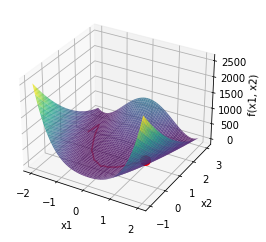

In [12]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X1, X2, f(X1, X2), cmap='viridis', alpha=0.8)
ax.scatter(optimal_x[0], optimal_x[1], optimal_f, color='r', marker='o', s=100)
ax.plot(*zip(*path), [f(*point) for point in path], linestyle='-', color='red', alpha=0.5)  # 绘制路径轨迹
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('f(x1, x2)')
plt.show()